<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-on Lab: Generating Synthetic QR Codes with the Trained Generator

Estimated time needed: **60** minutes

### Overview:

In this lab, we will develop a Generative Adversarial Network (GAN) to generate synthetic QR codes with embedded messages. We will start by creating a dataset of 100 QR codes, splitting it into training and validation sets. After preprocessing the images, we will build and train the GAN, consisting of a generator that produces QR codes and a discriminator that distinguishes between real and generated images. Over 5000 training epochs, we will optimize the GAN to create QR codes that are visually indistinguishable from the originals and contain the same messages when scanned. Finally, we will generate and save new QR codes to verify the performance of the generator.

### Learning Objectives:

In this lab, we aim to achieve the following objectives:

- Understand the principles of Generative Adversarial Networks (GANs).
- Generate synthetic QR codes using a trained GAN model.
- Build and optimize a generator and discriminator for the GAN.
- Preprocess image data for effective training of the GAN.
- Evaluate the performance of the GAN through generated outputs.

### Implementation:

#### Problem 1: Install Necessary Libraries

In [2]:
# Installing required libraries for generating QR codes and building the GAN
!pip install qrcode[pil] tensorflow numpy pillow matplotlib

# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import qrcode

# TensorFlow and Keras imports
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Reshape, LeakyReLU, BatchNormalization, Conv2DTranspose
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Import necessary layers and optimizers
# Write your code here
from tensorflow.keras.layers import Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


<details><summary>Click here for the solution</summary>



```python
from tensorflow.keras.layers import Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
```



</details>

#### Problem 2: Create Directories for QR Code Storage

In [3]:
# Create directory to store training QR codes
os.makedirs('qr_codes/train', exist_ok=True)

# Create directory to store validation QR codes
# Write your code here
os.makedirs('qr_codes/val', exist_ok=True)


<details><summary>Click here for the solution</summary>





```python
os.makedirs('qr_codes/val', exist_ok=True)
```





</details>

#### Problem 3: Generate QR Codes

In [4]:
# Define a function to generate QR codes with embedded messages and save them as image files.
def generate_qr_code(data, filename):
    qr = qrcode.QRCode(version=1, box_size=10, border=5)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)

# Generate a set of 80 training QR codes
for i in range(80):
    generate_qr_code(f"Message {i}", f"qr_codes/train/qr_code_{i}.png")

# Generate a set of 20 validation QR codes
# Write your code here
for i in range(20):
    generate_qr_code(f"Message {i + 80}", f"qr_codes/val/qr_code_{i}.png")


<details><summary>Click here for the solution</summary>





```python

for i in range(20):
    generate_qr_code(f"Message {i + 80}", f"qr_codes/val/qr_code_{i}.png")

```





</details>

#### Problem 4: Verify QR Code Generation

In [5]:
# Verify if the QR code images have successfully generated
# by counting the number of images in the training and validation directories.
train_images = os.listdir('qr_codes/train')
val_images = os.listdir('qr_codes/val')

# Print the number of generated training and validation images
# Write your code here
print(f"Training images generated: {len(train_images)}")
print(f"Validation images generated: {len(val_images)}")


Training images generated: 80
Validation images generated: 20


<details><summary>Click here for the solution</summary>





```python
print(f"Training images generated: {len(train_images)}")
print(f"Validation images generated: {len(val_images)}")


```





</details>

#### Problem 5: Load and Preprocess Images

In [6]:
# Define a function to load images from a directory, resize them, and normalize pixel values for better GAN performance.
def load_images(image_dir, target_size=(100, 100)):
    images = []
    filenames = os.listdir(image_dir)
    for filename in filenames:
        img = load_img(os.path.join(image_dir, filename), target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

# Load the training and validation images
train_images = load_images('qr_codes/train')
val_images = load_images('qr_codes/val')

# Normalize the images to the range [-1, 1]
train_images = (train_images - 127.5) / 127.5
val_images = (val_images - 127.5) / 127.5

# Print the shape of the training and validation images
# Write your code here
print(f"Training images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")


Training images shape: (80, 100, 100, 3)
Validation images shape: (20, 100, 100, 3)


<details><summary>Click here for the solution</summary>





```python

print(f"Training images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")

```





</details>

#### Problem 6:  Build the Generator Model

In [7]:
# Define and construct the generator model for the GAN.
# The model takes random noise as input and generates QR code images.
def build_generator():
    model = Sequential()

    # Initial dense layer to project the input noise into a higher-dimensional space
    model.add(Dense(256 * 25 * 25, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((25, 25, 256)))  # Reshape to a 3D tensor

    # First upsampling layer: Upsample to 50x50
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Second upsampling layer: Upsample to 100x100
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    # Output layer: Generates a 100x100 image with 3 color channels
    model.add(Conv2DTranspose(3, (4, 4), activation='tanh', padding='same'))

    return model

# Build the generator model and display the model's architecture
# write your code here
generator = build_generator()
generator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160000)              │      16,160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 50, 50, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 100, 100, 64)        │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 100, 100, 3)         │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,819,395 (64.16 MB)

 Trainable params: 16,819,011 (64.16 MB)

 Non-trainable params: 384 (1.50 KB)

<details><summary>Click here for the solution</summary>





```python

generator = build_generator()
generator.summary()

```





</details>

#### Problem 7: Build the Discriminator Model

In [8]:
# Define and construct the discriminator model for the GAN.
# The model classifies images as real or fake QR codes.
def build_discriminator():
    model = Sequential()

    # First convolutional layer: 64 filters, 3x3 kernel, same padding
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(100, 100, 3)))
    model.add(LeakyReLU(alpha=0.2))  # Leaky ReLU activation
    model.add(Dropout(0.4))  # Dropout for regularization

    # Second convolutional layer: 128 filters, 3x3 kernel, downsampled by 2
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    # Third convolutional layer: 256 filters, 3x3 kernel, downsampled by 2
    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    # Flatten the output for the final dense layer
    model.add(Flatten())

    # Output layer: Single neuron for binary classification with sigmoid activation
    model.add(Dense(1, activation='sigmoid'))

    return model

# Build, compile the discriminator model with binary crossentropy loss and Adam optimizer, and display its architecture
# write your code here
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │         160,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 530,817 (2.02 MB)

 Trainable params: 530,817 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

<details><summary>Click here for the solution</summary>





```python
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.summary()


```





</details>

#### Problem 8: Build the Combined GAN Model

In [9]:
# Combine the generator and discriminator into a single model,
# allowing the generator to be trained through the discriminator's feedback.
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the discriminator during GAN training

    # Define the input and output for the GAN model
    # gan_input = generator.input
    gan_input = generator.get_layer('dense').input
    # gan_output = discriminator(generator.output)
    gan_output = discriminator(generator.get_layer('conv2d_transpose_2').output)

    # Create the GAN model
    gan = Model(gan_input, gan_output)

    # Compile the GAN model with binary crossentropy loss and Adam optimizer
    gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    return gan

# Build the GAN model and display its architecture
# write your code here
gan = build_gan(generator, discriminator)
gan.summary()


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 160000)              │      16,160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 160000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 50, 50, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 100, 100, 64)        │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 100, 100, 3)         │           3,075 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │         530,817 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,350,212 (66.19 MB)

 Trainable params: 16,819,011 (64.16 MB)

 Non-trainable params: 531,201 (2.03 MB)

<details><summary>Click here for the solution</summary>





```python
gan = build_gan(generator, discriminator)
gan.summary()

```





</details>

#### Problem 9: Train the GAN

**You can experiment with different epoch values to find the optimal training duration. Be aware that running a large number of epochs may lead to kernel issues due to high resource usage.**

> **Note**: Please be patient, as the execution may take some time.

In [10]:
# Directory for saving model checkpoints
checkpoint_dir = 'gan_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Define a training function for the GAN, which alternates between
# training the discriminator on real and fake images and training the generator.
def train_gan(generator, discriminator, gan, epochs, batch_size, checkpoint_interval=100):
    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, train_images.shape[0], batch_size)  # Randomly select real images
        real_images = train_images[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))  # Generate random noise
        fake_images = generator.predict(noise)  # Generate fake images from noise

        # Train the discriminator on real and fake images
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))  # Real images labeled as 1
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))  # Fake images labeled as 0
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Average loss

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))  # Generate new noise
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # Label as 1 to fool the discriminator

        # Print the progress every 100 epochs
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D acc: {d_loss[1]}] [G loss: {g_loss}]")

        # Save the model every checkpoint_interval epochs
        if epoch % checkpoint_interval == 0:
            generator.save(os.path.join(checkpoint_dir, f"generator_epoch_{epoch}.h5"))
            discriminator.save(os.path.join(checkpoint_dir, f"discriminator_epoch_{epoch}.h5"))

# Start training the GAN with 5000 epochs and a batch size of 32
# write your code here
# train_gan(generator, discriminator, gan, epochs=5000, batch_size=32)
train_gan(generator, discriminator, gan, epochs=150, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7115278244018555 | D acc: 0.46875] [G loss: [array(0.7053708, dtype=float32), array(0.7053708, dtype=float32), array(0.53125, dtype=float32)]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

100 [D loss: 0.7236039638519287 | D acc: 0.17493903636932373] [G loss: [array(0.72364515, dtype=float32), array(0.72364515, dtype=float32), array(0.17450495, dtype=float32)]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

<details><summary>Click here for the solution</summary>





```python
train_gan(generator, discriminator, gan, epochs=5000, batch_size=32)


```





</details>

#### Problem 10: Generate QR Codes from the Generator

In [11]:
# Function to generate and save QR codes from the trained generator
def generate_and_save_qr_codes(generator, n_samples):
    # Generate noise as input for the generator
    noise = np.random.normal(0, 1, (n_samples, 100))

    # Use the generator to create fake images (QR codes)
    generated_images = generator.predict(noise)

    # Rescale images from [-1, 1] to [0, 1] for proper display and saving
    generated_images = 0.5 * generated_images + 0.5

    # Ensure the output directory exists
    os.makedirs('qr_codes/generated', exist_ok=True)

    # Save each generated QR code as an image
    for i in range(n_samples):
        plt.imshow(generated_images[i])
        plt.axis('off')  # Turn off the axis for a cleaner look
        plt.savefig(f"qr_codes/generated/qr_code_{i}.png")
        plt.close()  # Close the figure to prevent memory overflow

# Generate 10 QR codes using the trained generator
# write your code here
generate_and_save_qr_codes(generator, 10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step


<details><summary>Click here for the solution</summary>





```python

generate_and_save_qr_codes(generator, 10)

```





</details>

> **Note**: The list of QR codes will be available in the internal environment. You can see the image below the path for the QR codes. Inside the 'qr_codes' folder, there are two additional folders: one for 'train' QR codes and another for 'generated' QR codes. The code above uses 'train' data to generate 10 QR codes, so you can use the code below to display both the trained and generated QR codes here.

- Path for the Trained QR code: qr_codes/train/qr_code_1.png
- Path for the Generated QR code: qr_codes/generated/qr_code_1.png

You can change the last number from 1 to 9 in the path, such as **qr_codes/generated/qr_code_9.png**, to display the corresponding QR code.


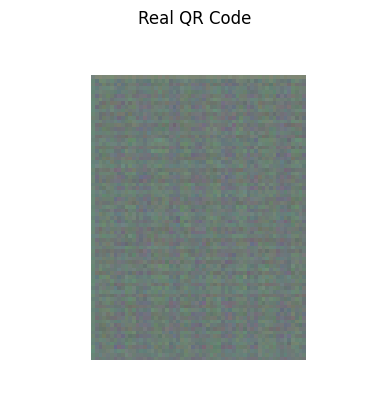

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and display a real QR code from the training dataset
def display_real_qr_code():
    real_image_path = 'qr_codes/generated/qr_code_0.png'  # You can change the filename to display another QR code
    real_image = load_img(real_image_path, target_size=(100, 100))

    # Convert the image to an array
    real_image_array = img_to_array(real_image) / 255.0  # Normalize to [0, 1] for display

    # Display the real QR code
    plt.imshow(real_image_array)
    plt.axis('off')  # Hide the axis
    plt.title('Real QR Code')
    plt.show()

display_real_qr_code()

**Note:**

GAN-generated images, such as QR codes, can sometimes appear noisy due to the inherent difficulty in balancing the training of the generator and discriminator. During early epochs, the generator may struggle to create realistic outputs, causing visual noise in the QR codes. This noise may also arise if the generator's learning process is unstable, or if the model fails to properly capture the features of the real QR codes.

**Why Noise is Generated:**
- **Insufficient Training:** If the GAN is not trained for enough epochs or is not optimized, the generator produces noisy or incomplete images.
- **Imbalance Between Generator and Discriminator:** If the discriminator becomes too good too quickly, the generator fails to learn properly, leading to noise.
- **Random Noise Input:** The generator uses random noise as input, and in earlier epochs, it struggles to convert this noise into meaningful features like clean QR codes.

**How to Improve and Get Clear QR Codes:**
1. **Increase Training Epochs:** Run the GAN for more epochs to allow the generator more time to learn the features of clean QR codes.
2. **Adjust Batch Size:** Lowering the batch size can sometimes improve the quality of generated images, allowing the generator to update weights more frequently.
3. **Use Smoothing Techniques:** Apply post-processing techniques like Gaussian filtering to smoothen the generated images.
4. **Tune Model Hyperparameters:** Adjust learning rates, optimizer choices, or loss functions for better stability in GAN training.

> By carefully tuning these parameters, you can generate clear, readable QR codes that effectively maintain the embedded message. We recommend that you try these experiments on a local machine, preferably one with high performance, as they may consume more memory.

### Summary:

In this lab, we successfully implemented a Generative Adversarial Network (GAN) to create synthetic QR codes. By generating a dataset of QR codes and training the GAN, we achieved a generator capable of producing QR codes that closely resemble real ones while retaining the embedded messages. Through hands-on experience with building and optimizing both the generator and discriminator, we deepened our understanding of GANs and their applications in synthetic data generation. The results demonstrate the potential of GANs in various fields, including data augmentation and creative applications.